# Simple Linear Regression


Mounted at /content/drive
    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
Y actual value:
[ 56642.  66029.  64445.  61

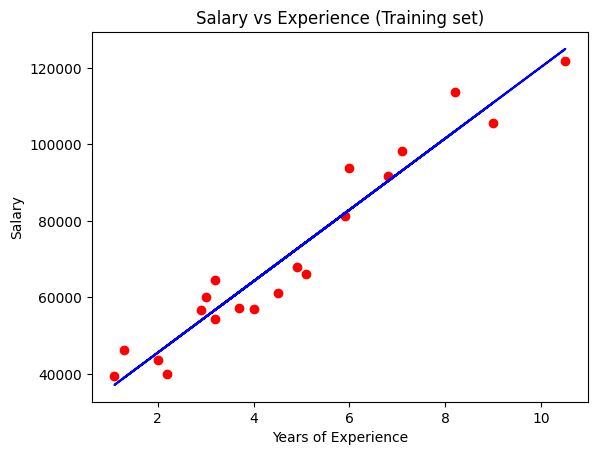

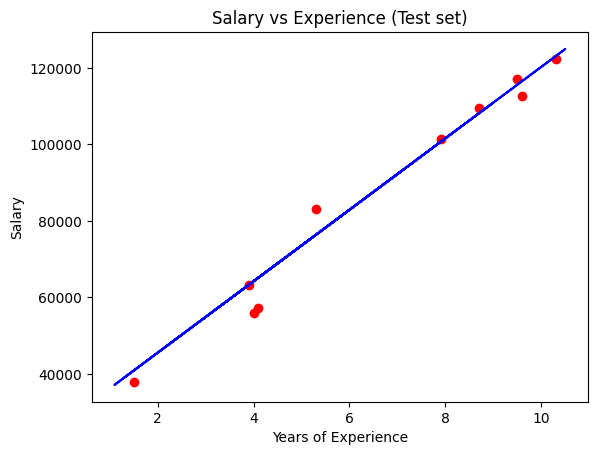

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive',force_remount=True)

file_path = '/content/drive/My Drive/AI-projects-lab/ml-datasets/salary_data.csv'
dataset = pd.read_csv(file_path)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(dataset)

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Training the simple regressor
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediciton
y_pred = regressor.predict(X_test)
print('Y actual value:\n{0}'.format(y_train))
print('Y predicted value:\n{0}'.format(y_pred))

# Visualization Training set
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualization Test set
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Multiple Linear Regression

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount('/content/drive',force_remount=True)
location = '/content/drive/My Drive/AI-projects-lab/ml-datasets/50_Startups.csv'

dataset = pd.read_csv(location)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print('Dataset : {0}'.format(dataset.head(10)))

# Encoding categorical data -> State
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(
    transformers=[
        ('encoder',OneHotEncoder(),[3])
        ],
    remainder='passthrough')
transformed_X = transformer.fit_transform(X)
print('\nTransformed X:\n{0}'.format(transformed_X))
X= transformed_X

# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Import model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print('\nPredictions vs Actual:\n{0}'.format(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)))




Mounted at /content/drive
Dataset :    R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
5  131876.90        99814.71        362861.36    New York  156991.12
6  134615.46       147198.87        127716.82  California  156122.51
7  130298.13       145530.06        323876.68     Florida  155752.60
8  120542.52       148718.95        311613.29    New York  152211.77
9  123334.88       108679.17        304981.62  California  149759.96

Transformed X:
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0

# Polynomial Regression

**from sklearn.preprocessing import PolynomialFeatures:**

This imports the PolynomialFeatures class from the sklearn.preprocessing module. PolynomialFeatures is used to generate a new feature matrix consisting of all polynomial combinations of the features with a specified degree.

**poly_reg = PolynomialFeatures(degree = 4):**

This creates an instance of the PolynomialFeatures class with the degree set to 4. This means the model will consider polynomial features up to the 4th degree. For example, if your original feature
𝑋
X is
𝑥
x, the new features will include
𝑥
0
,
𝑥
1
,
𝑥
2
,
𝑥
3
,
x
0
 ,x
1
 ,x
2
 ,x
3
 , and
𝑥
4
x
4
 .

**X_poly = poly_reg.fit_transform(X):**

This line transforms the original features
𝑋
X into a new feature matrix that includes the polynomial features up to the specified degree.
If
𝑋
X originally has one feature, after this transformation,
𝑋
𝑝
𝑜
𝑙
𝑦
X
p
​
 oly will include that feature raised to the power of 0, 1, 2, 3, and 4, respectively. The fit_transform method fits the PolynomialFeatures to
𝑋
X and then transforms
𝑋
X to the polynomial features.

**lin_reg_2 = LinearRegression():**

This creates an instance of the LinearRegression class, which will be used to fit a linear regression model to the transformed polynomial features.

**lin_reg_2.fit(X_poly, y):**

This fits the linear regression model to the polynomial features
𝑋
𝑝
𝑜
𝑙
𝑦
X
p
​
 oly and the target variable
𝑦
y. The model will learn the coefficients for each polynomial term to best fit the data.

Mounted at /content/drive

Dataset :
            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000

X:
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

X_poly:
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.0

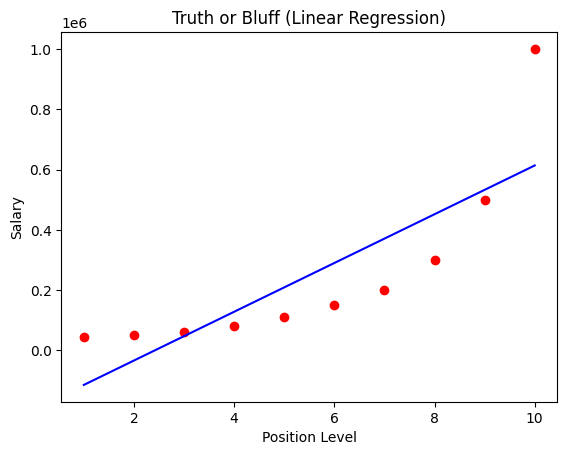

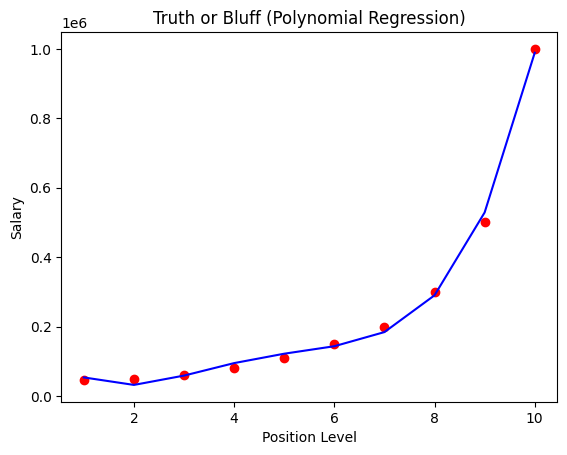

array([158862.45265155])

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount('/content/drive',force_remount=True)
location = '/content/drive/My Drive/AI-projects-lab/ml-datasets/Position_Salaries.csv'

dataset = pd.read_csv(location)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print('\nDataset :\n{0}'.format(dataset.head(10)))

# Training the model on whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Training the Polynomial Regression on whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
print('\nX:\n{0}'.format(X))
X_poly = poly_reg.fit_transform(X)
print('\nX_poly:\n{0}'.format(X_poly))


lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)


plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#
lin_reg.predict([[6.5]])
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))


# Support Vector Regression (SVR)

**scaler_x.fit_transform(X)**:

Standardizes the feature matrix
𝑋
X so that each feature has a mean of 0 and a standard deviation of 1, storing the result in X_scaled.


**y.reshape((-1, 1)):**

Reshapes the 1D array
𝑦
y into a 2D array with one column, making it compatible with StandardScaler.


**scaler_y.fit_transform(y):**

 Standardizes the target variable
𝑦
y in a similar way to how the feature matrix was standardized, storing the result in y_scaled.
By performing these steps, both the features
𝑋
X and the target
𝑦
y are scaled, which can lead to better performance and convergence in many machine learning algorithms.

Mounted at /content/drive
            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000

X scaled:
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

y scaled:
[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]

Predicted output: 
[[90752.75]]



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


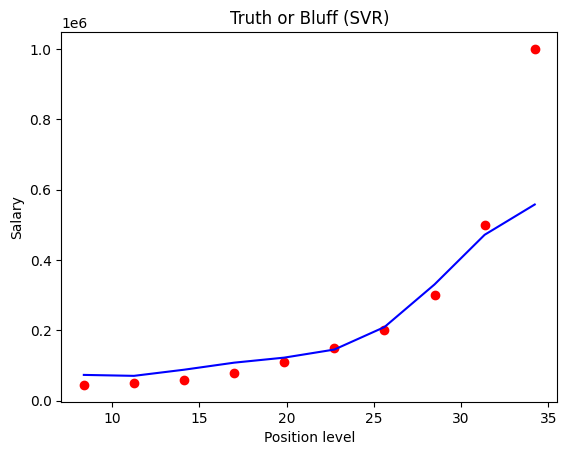

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount('/content/drive',force_remount=True)
location = '/content/drive/My Drive/AI-projects-lab/ml-datasets/Position_Salaries.csv'

dataset = pd.read_csv(location)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

print(dataset)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_grid = scaler_x.fit_transform(X)
y = y.reshape((-1,1))
y = scaler_y.fit_transform(y)

print('\nX scaled:\n{0}'.format(X))
print('\ny scaled:\n{0}'.format(y))

# Training the SVR model
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

output = scaler_y.inverse_transform(regressor.predict(scaler_x.transform([[6.5]])).reshape(-1,1))
print('\nPredicted output: \n{0}\n'.format(output))

plt.scatter(scaler_x.inverse_transform(X), scaler_y.inverse_transform(y), color = 'red')
plt.plot(scaler_x.inverse_transform(X), scaler_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


# Decision Tree Regression

Suppose you want to build a decision tree to classify whether a person will buy a product based on age and income:

**Root Node:** The tree might start by splitting the data based on age, say, "Is Age < 30?".

If true, the data goes to one branch.
If false, it goes to another branch.
Internal Nodes: Each branch is further split based on income, e.g., "Is Income > $50,000?".

Each split creates more branches, resulting in more specific groups.

**Leaf Nodes:** Eventually, the branches lead to leaf nodes that predict whether the person will buy the product or not, based on the majority class in that leaf or the average target value.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount('/content/drive',force_remount=True)
location = '/content/drive/My Drive/AI-projects-lab/ml-datasets/Position_Salaries.csv'

dataset = pd.read_csv(location)
print(dataset.head(10))
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)

regressor.predict([[6.5]])

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Random Forest Regression

**n_estimators=10:**

This specifies the number of decision trees that the Random Forest will create in the ensemble. In this case, 10 decision trees will be built.
Decision Trees: A Random Forest is an ensemble of multiple decision trees. Each tree is built using a random subset of the data, and the final prediction is typically the average (in regression) of the predictions made by all the trees.
More trees generally lead to better performance because they reduce the risk of overfitting by averaging the predictions, but this comes with a trade-off in terms of computational cost and memory usage.


**random_state=0:**

This is a seed value that ensures the randomness in the model is consistent across runs. By setting random_state=0, the model's behavior (e.g., the random sampling of data for each tree) will be the same every time you run the code.
Consistency: This is important for reproducibility. If you set the random_state, you can ensure that the results will be the same if you or someone else runs the same code again.

Mounted at /content/drive


<ipython-input-21-ac851d19d409>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


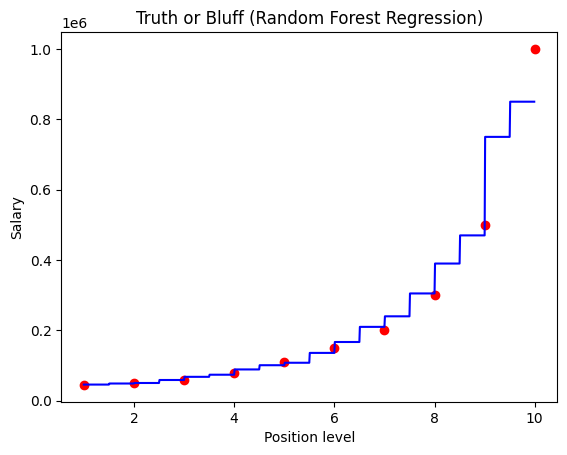

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

drive.mount('/content/drive',force_remount=True)
location = '/content/drive/My Drive/AI-projects-lab/ml-datasets/Position_Salaries.csv'

dataset = pd.read_csv(location)
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)

regressor.fit(X,y)

regressor.predict([[6.5]])

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
